<a href="https://colab.research.google.com/github/LiscaAngriani/APM_Kelompok3/blob/main/Decision_Tree_C4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus 

data=pd.read_csv('Social_Network.csv')
print(data)

           Id  Age  EstimatedSalary  Purchased  Gender
0    15624510   19            19000          0    Male
1    15810944   35            20000          0    Male
2    15668575   26            43000          0  Female
3    15603246   27            57000          0  Female
4    15804002   19            76000          0    Male
..        ...  ...              ...        ...     ...
395  15691863   46            41000          1  Female
396  15706071   51            23000          1    Male
397  15654296   50            20000          1  Female
398  15755018   36            33000          0    Male
399  15594041   49            36000          1  Female

[400 rows x 5 columns]


In [2]:
data = data.drop(labels='Id', axis=1)
feature_names=['Age','EstimatedSalary','Purchased']
features = data[feature_names]
label = data.Gender 


In [3]:
clf = DecisionTreeClassifier(random_state=0, max_depth=None,
                            min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0) 
clf = clf.fit(features,label) 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0) 
prediction = clf.predict(X_test) 

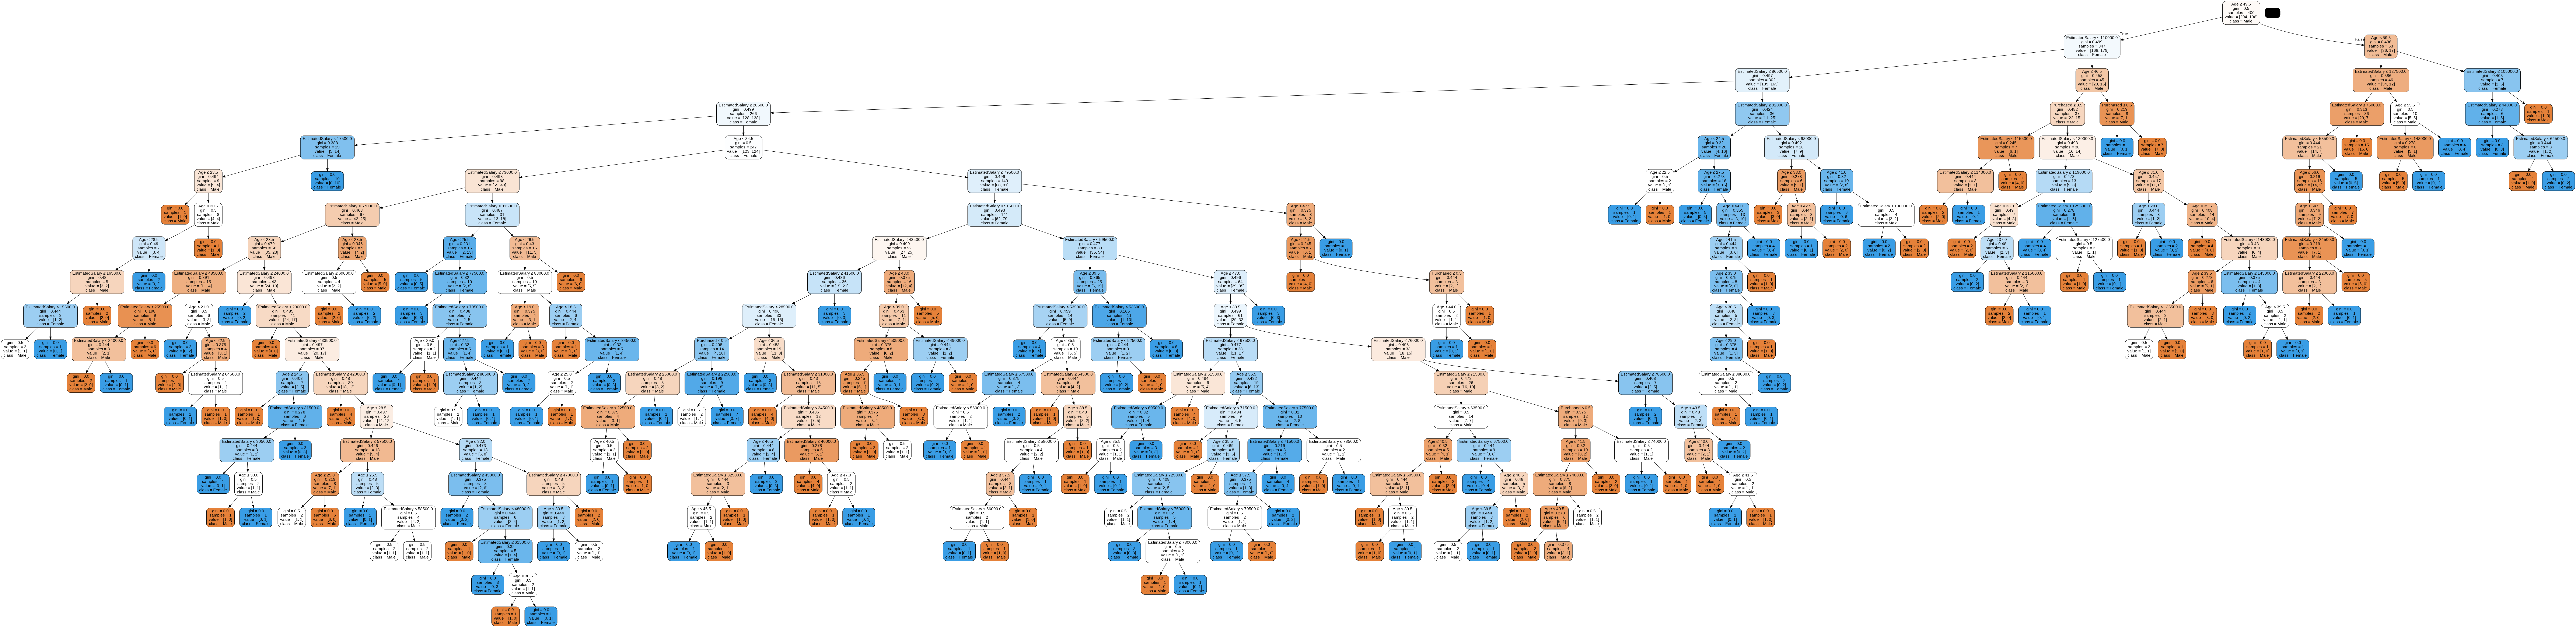

In [5]:
vis_data = export_graphviz(clf, out_file=None,   
                filled=True, rounded=True,
                special_characters=True, 
                feature_names=feature_names,
                class_names=label.unique()) 
graph = pydotplus.graph_from_dot_data(vis_data)  
graph.write_png('social_network_ads.png')
Image(graph.create_png())